<a href="https://colab.research.google.com/github/Charanpoojary/CUSTOMER-SEGMENTATION-UNSUPERVISED-ML-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Customer Segmentation**

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

##**Customer segmentation:**

Also known as market segmentation, customer segmentation is the division of potential customers in a given market into discrete groups. That division is based on customers having similar:

* Needs (i.e., so a single whole product can satisfy them)


* Buying characteristics (i.e., responses to messaging, marketing channels, and sales channels, that a single go-to-market approach can be used to sell to them competitively and economically)

There are three main approaches to market segmentation:

* A priori segmentation, the simplest approach, uses a classification scheme based on publicly available characteristics—such as industry and company size—to create distinct groups of customers within a market. However, a priori market segmentation may not always be valid since companies in the same industry and of the same size may have very different needs.

* Needs-based segmentation is based on differentiated, validated drivers (needs) that customers express for a specific product or service being offered. The needs are discovered and verified through primary market research, and segments are demarcated based on those different needs rather than characteristics such as industry or company size.

* Value-based segmentation differentiates customers by their economic value, grouping customers with the same value level into individual segments that can be distinctly targeted.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#Load all the required packages
import pandas as pd
import numpy as np
import time
import datetime
from time import mktime
from datetime import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

##**IMPORTING DATASET:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file path
dfRetail=pd.read_excel('/content/drive/MyDrive/Datasets/Online Retail.xlsx')
##dataset top 5 rows
dfRetail.head()  #returns the first 5 rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##**ANALYZING DATASET**

In [ ]:
dfRetail.tail()   # returns the lower 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
dfRetail.shape   # returns the shape of dataset( rows and columns)

(541909, 8)

In [ ]:
dfRetail.info()   # returns the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
dfRetail.columns   # returns the columns of the dataset

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
dfRetail = dfRetail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]   # shifting the columns

In [ ]:
dfRetail.head() # returns the first 5 rows

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


##**PREPROCESSING:**

In [ ]:
df = dfRetail.copy()   # Copy the Dataframe in case if we mess up something


In [ ]:
df.describe()   # returns the numerical columns

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [ ]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


##**HANDELING NULL VALUES:**

In [ ]:
df.drop_duplicates(inplace=True, keep='first')   # Drop Duplicated rows of data from the DataFrame

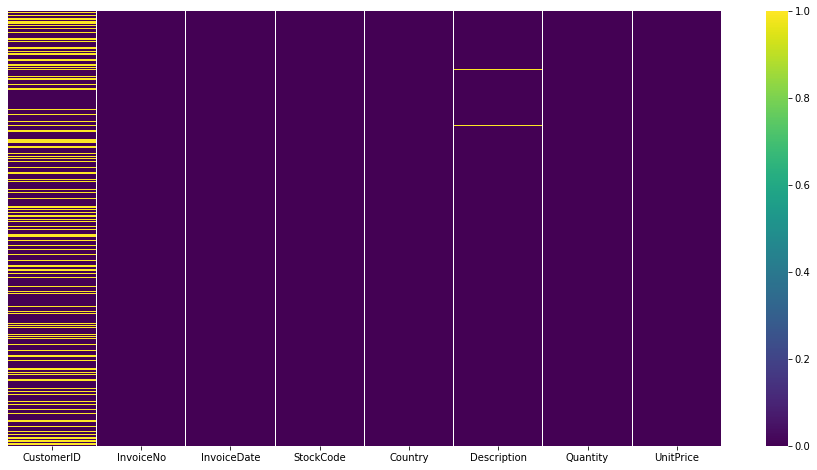

In [ ]:
plt.figure(figsize=(16,8))    # plotting the heatmap to check null values
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

**OBSERVATION:**
* Here shining yellow lines are null values.

**Drop the entries where both the CustomerID and Description are null values.**

In [ ]:
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)   # Drop the entries where both the CustomerID and Description are null values.

In [ ]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [ ]:
df.columns  # returns the columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)  # Drop the null values in customer ID field

In [ ]:
df.info()   # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Country      401604 non-null  object        
 5   Description  401604 non-null  object        
 6   Quantity     401604 non-null  int64         
 7   UnitPrice    401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df.describe()  # returns the numerical columns

,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


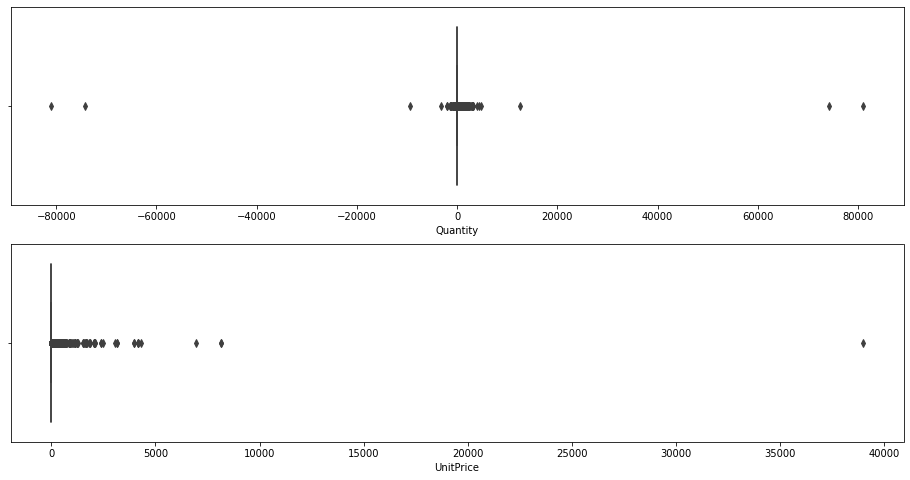

In [ ]:
# plotting graph of unit price and quantity
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])    # there are some null values here
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [ ]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


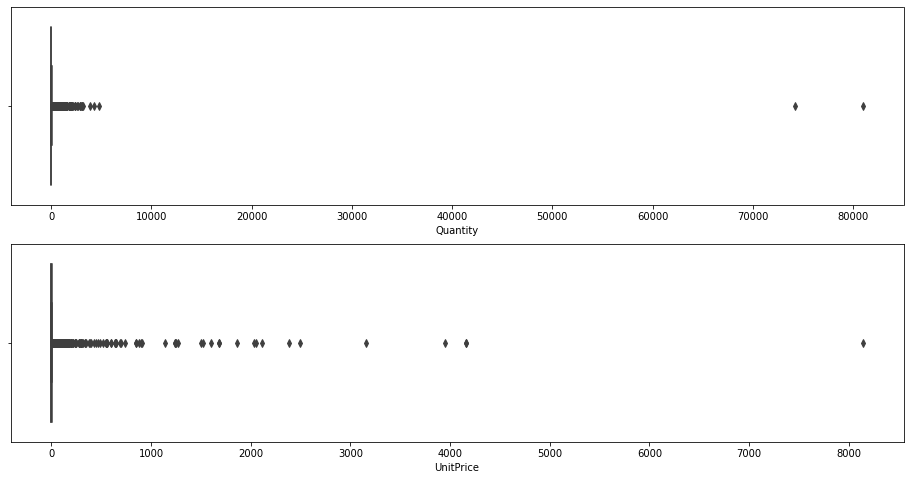

In [ ]:
# again plotting the graph of unit price and quantity
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])  # now we can see that there is no null values present in quantity
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [ ]:
df.describe()   # returns the numerical columns

,CustomerID,Quantity,UnitPrice
count,392692.000000,392692.000000,392692.000000
mean,15287.843865,13.119702,3.125914
std,1713.539549,180.492832,22.241836
min,12346.000000,1.000000,0.001000
25%,13955.000000,2.000000,1.250000
50%,15150.000000,6.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [ ]:
# we know that our column 'CustomerID' is object type 
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x)) # Convert the Data Type of 'CustomerID' to Integer using Lambda Function

In [ ]:
df.head() # returns the top 5 rows of the datasets

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [ ]:
df['Total_Price'] = df['Quantity']*df['UnitPrice'] # creating a new column total price by using unit price and quantity

In [ ]:
# total price column has been added to our dataset
df.head() # returns the first 5 rows of the dataset 

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")
df["InvoiceDate"]
# extracting year,month,weekday,time_hr,minutes_hr from invoicedate column
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [ ]:
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)  # checking the length of the above created variable

(392692, 392692, 392692, 392692, 392692)

In [ ]:
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',          # converting month number into month name
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [ ]:
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}  #converting weekday number into week name
weekday = weekday.map(day)

In [ ]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [ ]:
# firstly we extracted some varibales from invoicedate ,now creating some columns by using those variables
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))  # using the above created function here 

In [ ]:
# above created column will be added to our dataset
df.head()  # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [ ]:
df.columns  #returns the column of our dataset

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice', 'Total_Price', 'Year', 'Month',
       'WeekDay', 'TimePeriod'],
      dtype='object')

In [ ]:
#shifting columns 
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [ ]:
#checking the columns
df.head()  # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [ ]:
customerDF = df.copy()  # copying our dataframe into custmer df

In [ ]:
customerDF.head() # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [ ]:
customerDF.info()# returns the information of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  int64         
 1   InvoiceNo    392692 non-null  object        
 2   InvoiceDate  392692 non-null  datetime64[ns]
 3   Year         392692 non-null  int64         
 4   Month        392692 non-null  object        
 5   WeekDay      392692 non-null  object        
 6   TimePeriod   392692 non-null  object        
 7   StockCode    392692 non-null  object        
 8   Country      392692 non-null  object        
 9   Description  392692 non-null  object        
 10  Quantity     392692 non-null  int64         
 11  UnitPrice    392692 non-null  float64       
 12  Total_Price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 41.9+ MB


In [ ]:
customerDF.describe() # now we can see year and total price has been added ( numerical columns)

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [ ]:
customerDF.describe(include=['O'])  # object type of column

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


##**Top 30 Customers of our Retail Chain are:**

In [ ]:
#extracting best customers using groupby
best_customers = customerDF.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]   # extracting top 30 customers using groupby
best_customers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


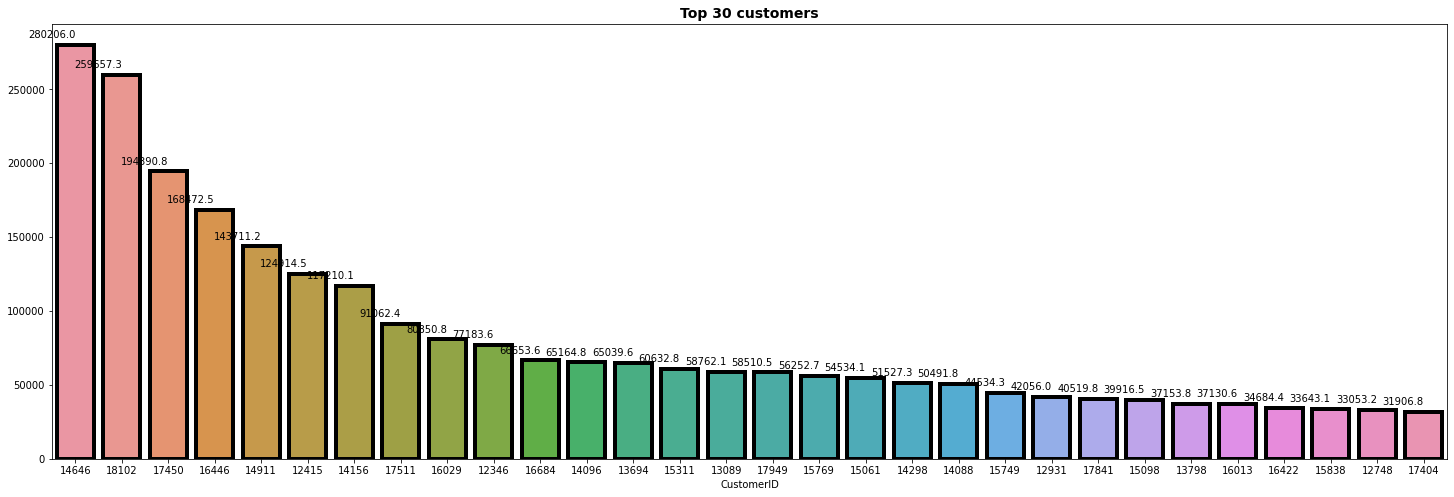

In [ ]:
# ploting bar chart for best_customers
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(best_customers.index, best_customers.values, order=best_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#  Yearly purchasing stats

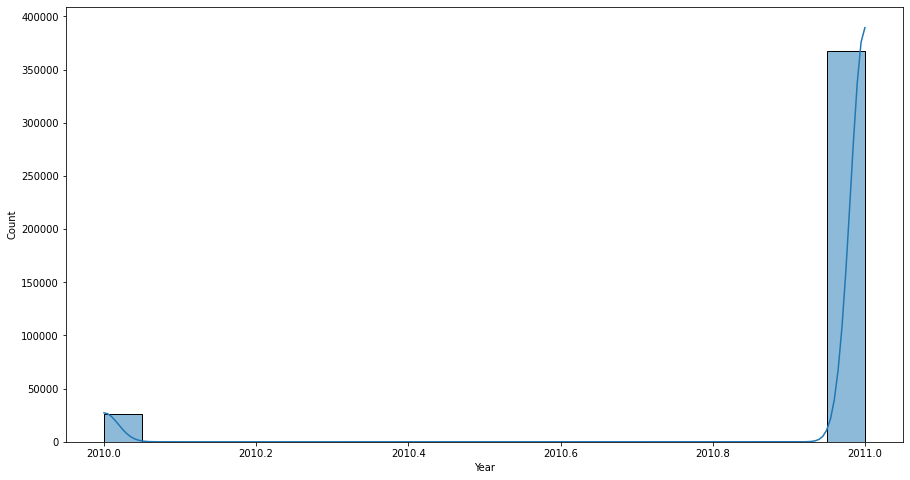

In [ ]:
# purchase based on year 
# plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="Year", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


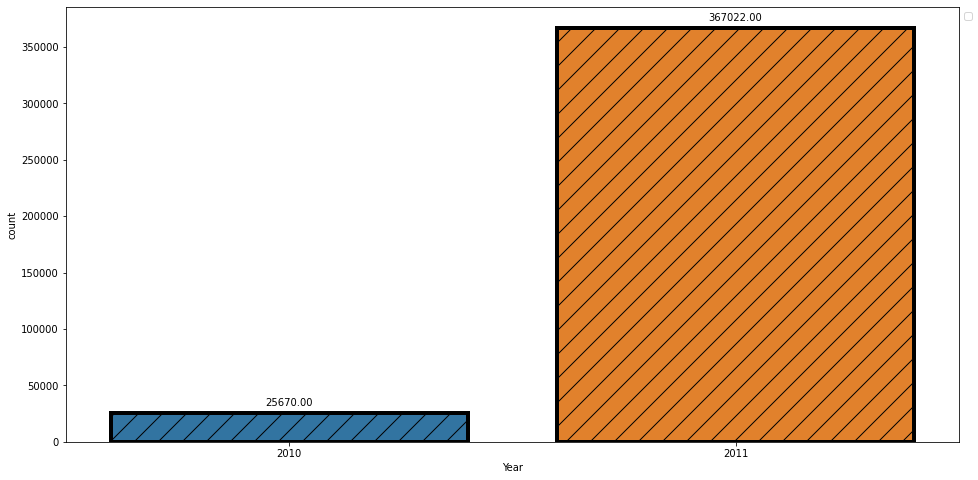

In [ ]:
# purchase based on year using different type of graph
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['Year'],lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
# OBSERVATION:

# Here we can see huge spike in 2011 this is because we only have december months data from 2010.

##**Monthly purchasing stats**

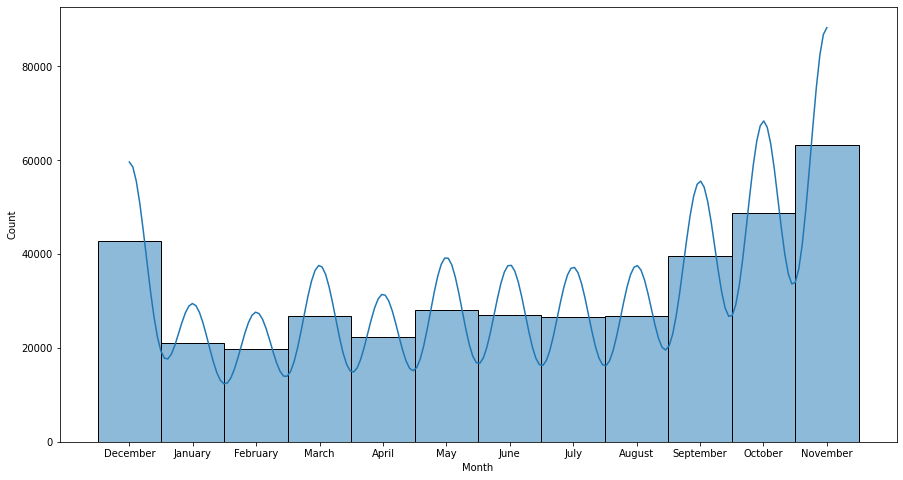

In [ ]:
# purchase based on month
# plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="Month", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


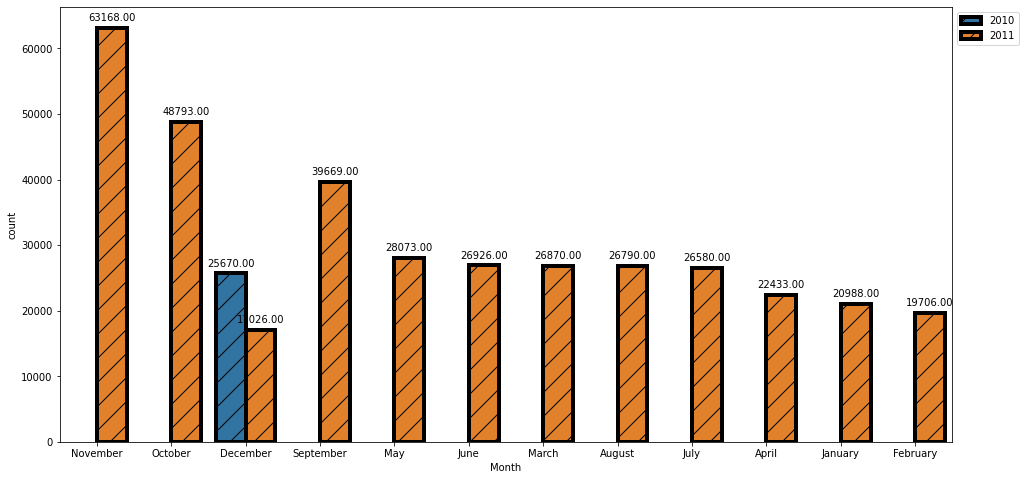

In [ ]:
# purchase based month using different type of graph
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['Month'], order=customerDF['Month'].value_counts().index, hue=customerDF['Year'],lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
# OBSERVATION:

# Here we can see there is huge sale in the month of october and november.

##**Week day purchasing stats**

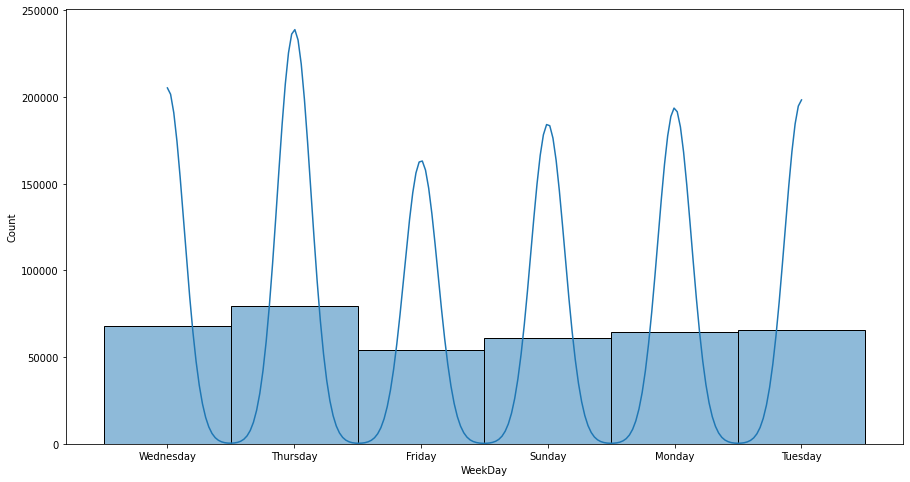

In [ ]:
# purchase based on week day
# plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="WeekDay", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


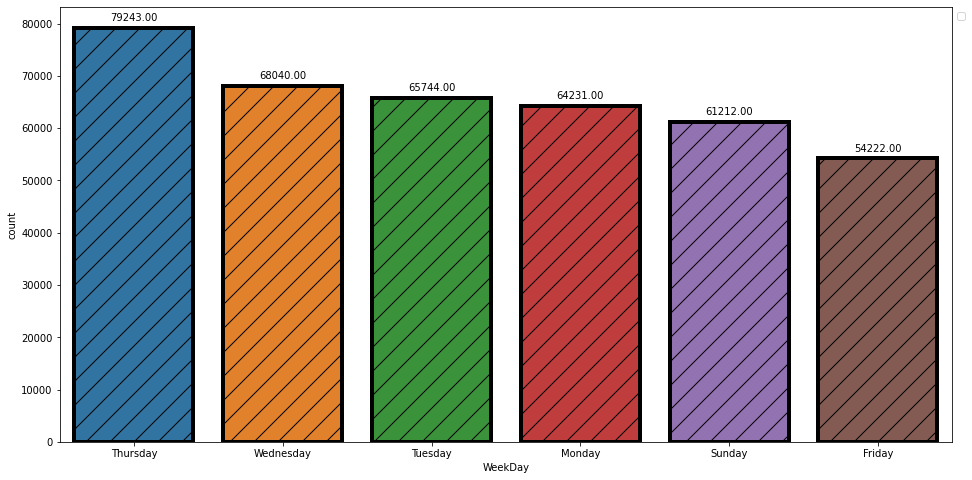

In [ ]:
# purchase based on week day using different type of graph
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['WeekDay'], order=customerDF['WeekDay'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
# OBSERVATION:

# Here we cann see on wednesday and thursday there is more sale.

##**Time period purchasing stats**

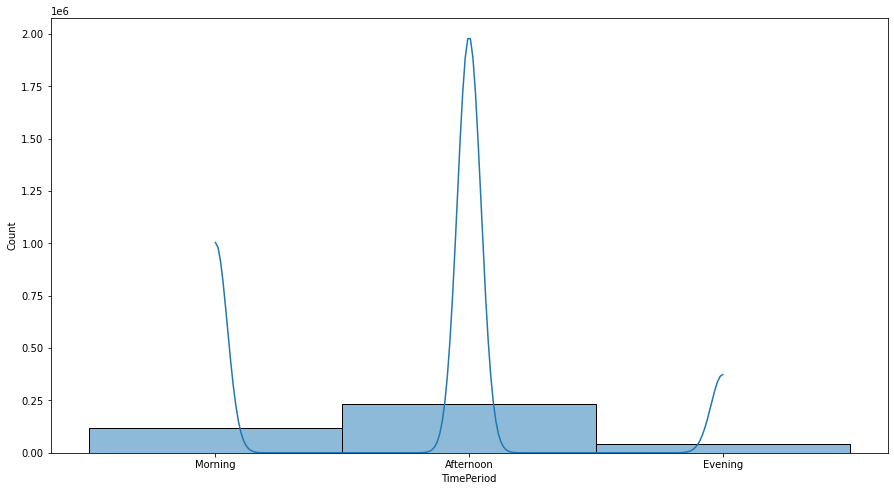

In [ ]:
# purchase based on time period
# plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="TimePeriod", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


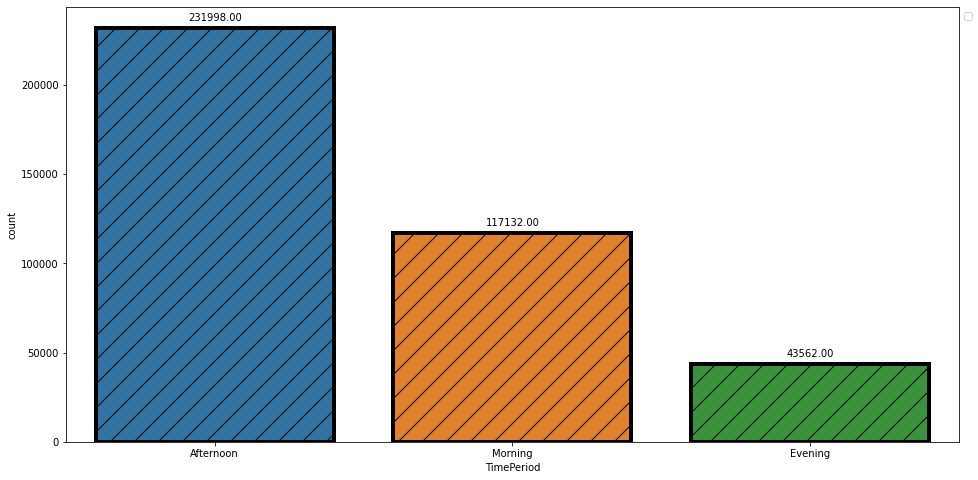

In [ ]:
# purchase based on time period using different type of graph
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['TimePeriod'], order=customerDF['TimePeriod'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
 # OBSERVATION:

 # Here we can see most of the people are buying in the afternoon time period.


**Insights from the Periodical Plots:**

**OBSERVATION:**

* Sales are very high in October, November & 

* We have only December sales data from 2010

* The Retail Store is Closed on Saturday as per the Information available

* More number of sales are happening during Middle of the week(Tuesday, Wednesday and Thursday)

* People are usually visiting the store during the afternoon hours when compared to Mornng & Evening Times

* The total no of sales in December 2010 is higher then December 2011

* Management has to concentrate on the decrease of sales in December

##**Most Revenue Generated WeekDay:**

In [ ]:
weekly_sales = customerDF.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)   #EXTRACTING MOST REVENUE GENERATED WEEKDAY USING GROUPBY 
weekly_sales

WeekDay
Thursday     1973015.730
Tuesday      1697733.801
Wednesday    1584283.830
Friday       1483080.811
Monday       1363604.401
Sunday        785490.321
Name: Total_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


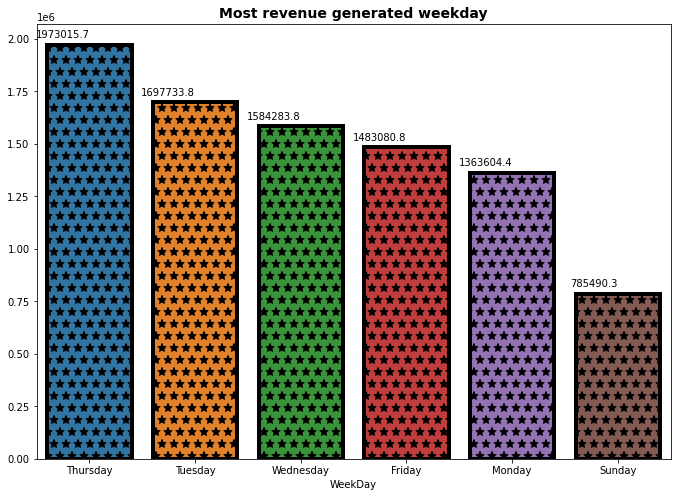

In [ ]:
# plotting the bar chart for weekly_sales
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax=sns.barplot(weekly_sales.index, weekly_sales.values, order=weekly_sales.index,lw=4,
               ec='black',hatch='*')
plt.title("Most revenue generated weekday", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# OBSERVATION:

# On Thursday Company is generating the highest Revenue
# On Sunday company is generating less revenue

##**Price Stats**




In [ ]:
country_sales = customerDF.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False) # price stats based on different countries
country_sales

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


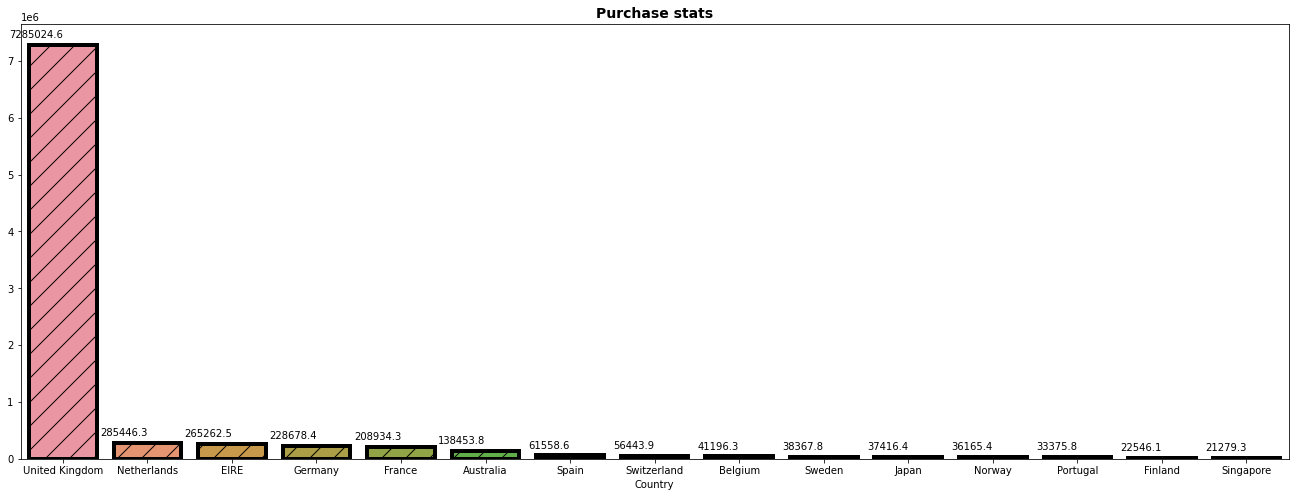

In [ ]:
# plotting the bar chart for country_sales
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
ax=sns.barplot(country_sales[:15].index, country_sales[:15].values,lw=4,
               ec='black',hatch='/')
plt.title("Purchase stats", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* Here we can see united kingdom is the country which purchace more items as compared to other country.
* Singapore is a least purchasing country.

In [ ]:
# OBSERVATION:

# Here we can see united kingdom is the country which has highest price stats compared to other country.

##**Top quantity Purchasing Countries:**

In [ ]:
#extracting top purchasing country
sales = df.groupby(by='Country').agg({'Quantity' : 'sum', 
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

In [ ]:
#top 10
sales=sales[:10]
sales=sales.reset_index()
sales

,Country,Quantity,Total_Price
0,United Kingdom,4241305,7285024.644
1,Netherlands,200361,285446.340
2,EIRE,140133,265262.460
3,Germany,119154,228678.400
4,France,111428,208934.310
5,Australia,83891,138453.810
6,Sweden,36078,38367.830
7,Switzerland,30082,56443.950
8,Spain,27933,61558.560
9,Japan,26016,37416.370


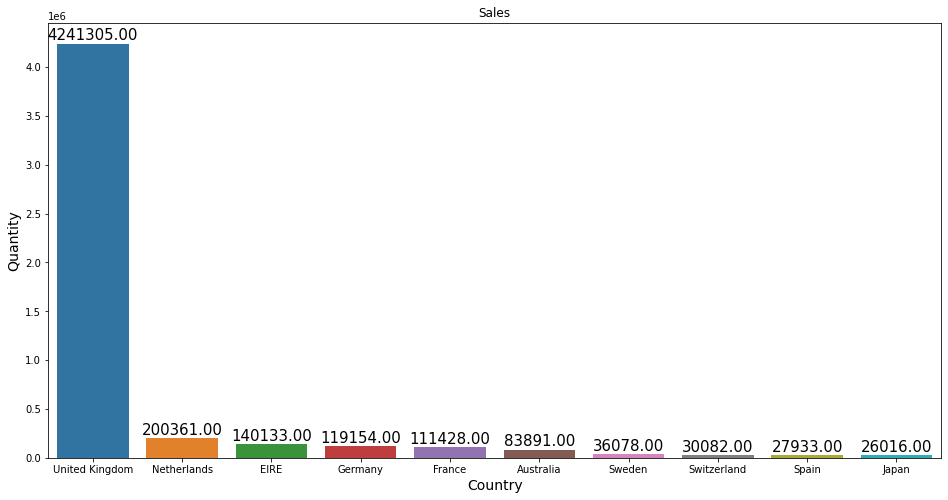

In [ ]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=sales)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Sales")
 
# Finally showing the plot
plt.show()

In [ ]:
# Above we can see UK has the highest purchase rate

##**Product Sales Categorization**

In [ ]:
product_sales = customerDF.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)     #extracting product sale
product_sales

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
                                      ...  
PINK POLKADOT KIDS BAG                    1
WHITE ROSEBUD  PEARL EARRINGS             1
HEN HOUSE W CHICK IN NEST                 1
CAPIZ CHANDELIER                          1
EASTER CRAFT IVY WREATH WITH CHICK        1
Name: Quantity, Length: 3877, dtype: int64

In [ ]:
# Top 20 Sold Products

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


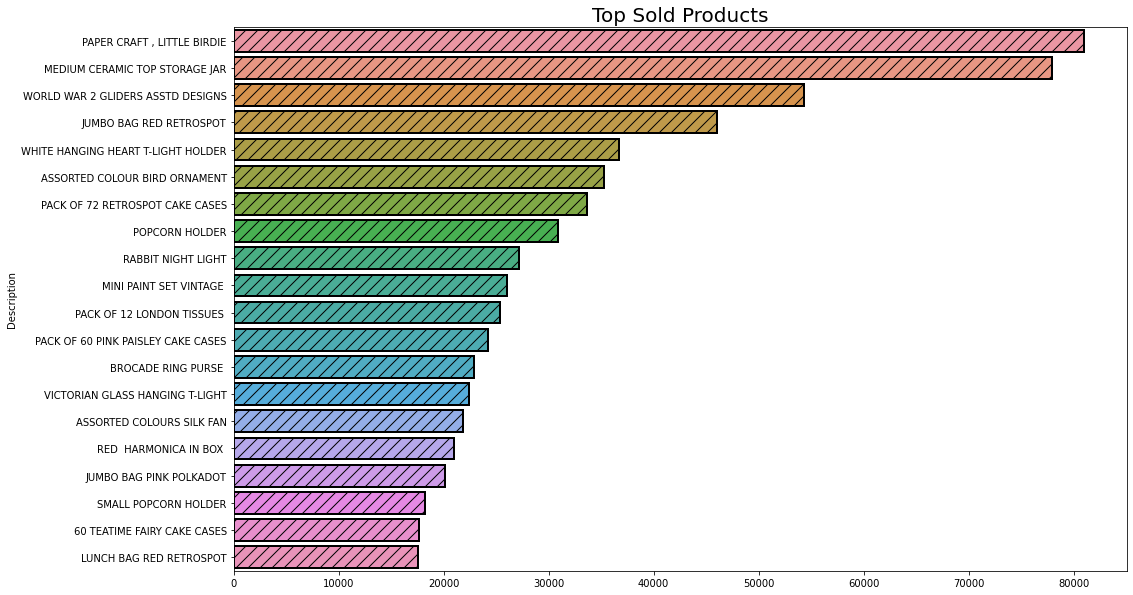

In [ ]:
# plotting graph for product_sales
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(product_sales[:20].values, product_sales[:20].index,ec='black',linewidth=2,hatch='//')

In [ ]:
# OBSERVATION

# Here we can see most sold product product is Paper craft, little birdie.

##**Most Revenue Generated Products**

In [ ]:
product_revenue = customerDF.groupby(by='Description')['Total_Price'].sum().sort_values(ascending=False)   #extracting most revenue generated product
product_revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142264.750
WHITE HANGING HEART T-LIGHT HOLDER    100392.100
JUMBO BAG RED RETROSPOT                85040.540
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: Total_Price, Length: 3877, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


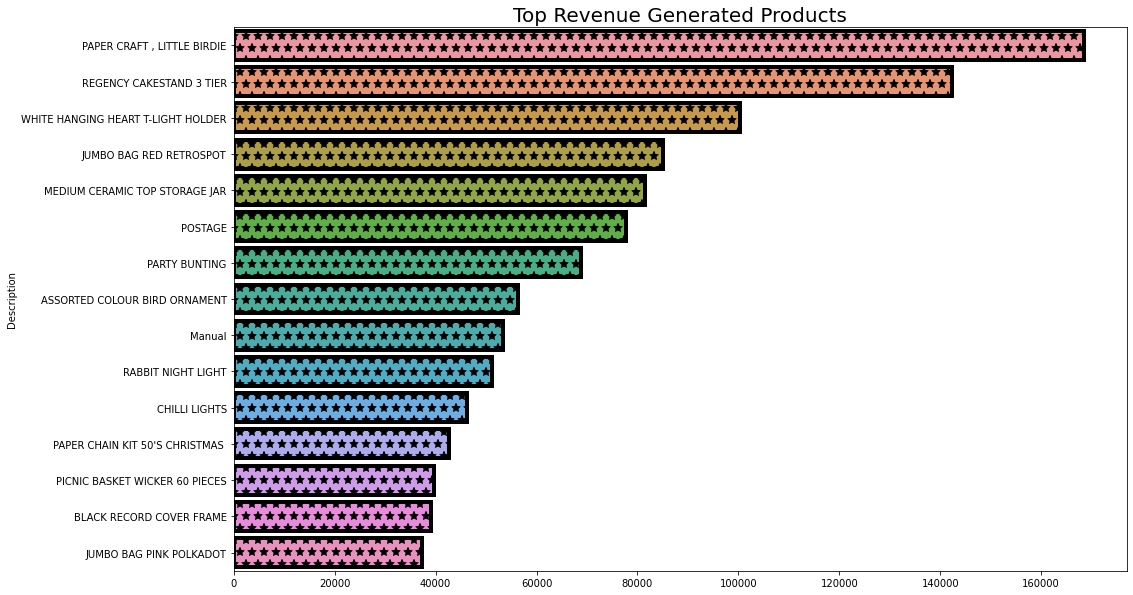

In [ ]:
# plotting graph for product_revenue
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(product_revenue[:15].values, product_revenue[:15].index,lw=4,
               ec='black',hatch='*')

In [ ]:
# OBSERVATION:

# Here we can see most revenue generated product is Paper craft, little birdie 

##Customers Stats



In [ ]:
most_purchased_customer= customerDF.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)    #extracting most_purchased_customer
most_purchased_customer

CustomerID
14646    196915
16446     80997
14911     80240
12415     77374
12346     74215
          ...  
16742         1
15802         1
15823         1
17956         1
17846         1
Name: Quantity, Length: 4338, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


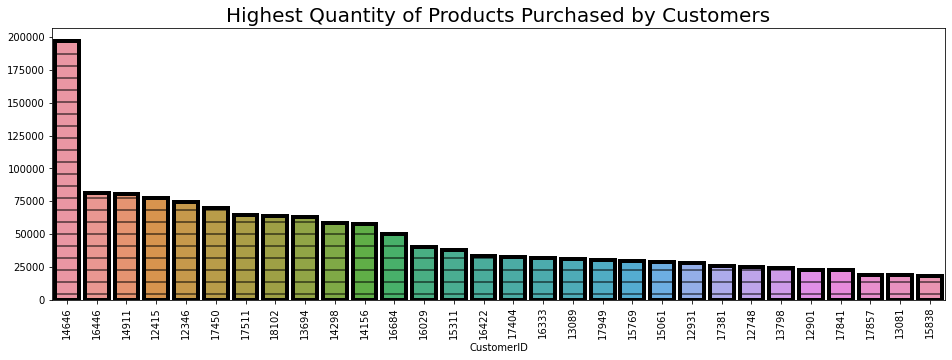

In [ ]:
# plotting graph for top 30 purchased customer
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=20)
sns.barplot(most_purchased_customer[:30].index, most_purchased_customer[:30].values, order=most_purchased_customer[:30].index,lw=4,
               ec='black',hatch='-')

In [ ]:
# OBSERVATION:

# 14646 customer id has the most number of purchase rate

In [ ]:
most_purchased_customer.describe()  # returns the numerical information of the column

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
75%         989.750000
max      196915.000000
Name: Quantity, dtype: float64

In [ ]:
# creating function to divide customers into bronze silver gold category
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif x >= 1000:
        return "Gold"

In [ ]:
# applying function
most_purchased_customer_categories = most_purchased_customer.apply(lambda x: Loyalty(x))
most_purchased_customer_categories

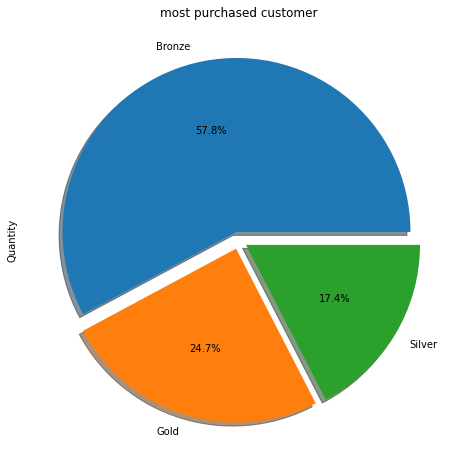

In [ ]:
#plottingh pie diagram
most_purchased_customer_categories.value_counts().plot.pie(figsize=(10,8),legend=False,autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05),title='most purchased customer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


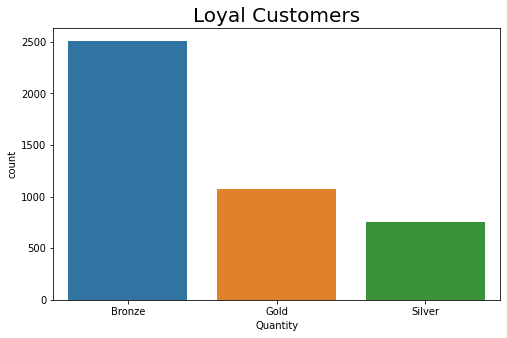

In [ ]:
# plotting the bar graph for the same
plt.figure(figsize=(8,5))
plt.title("Loyal Customers", fontsize=20)
sns.countplot(most_purchased_customer_categories, order=most_purchased_customer_categories.value_counts().index)

In [ ]:
# OBSERVATION:

 # Here we can see we have more no of bronze customers.

##**11 - Unique customer in every month**

In [ ]:
Unique_customer = customerDF[customerDF['Year'] == 2011].groupby(by='Month')['CustomerID'].nunique()   # extracting unique customers
Unique_customer

Month
April         856
August        935
December      615
February      758
January       741
July          949
June          991
March         974
May          1056
November     1664
October      1364
September    1266
Name: CustomerID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


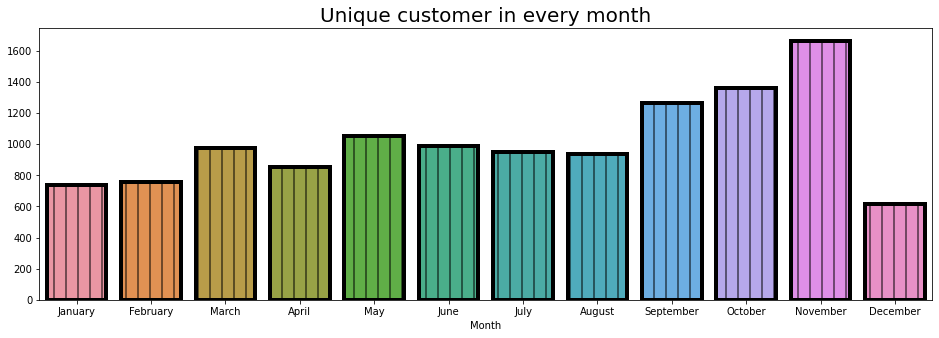

In [ ]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title('Unique customer in every month', fontsize = 20)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(Unique_customer.index, Unique_customer.values, order=months,lw=4,
               ec='black',hatch='|')

In [ ]:
# In the month of november there were more number of customer

# **Correlation**

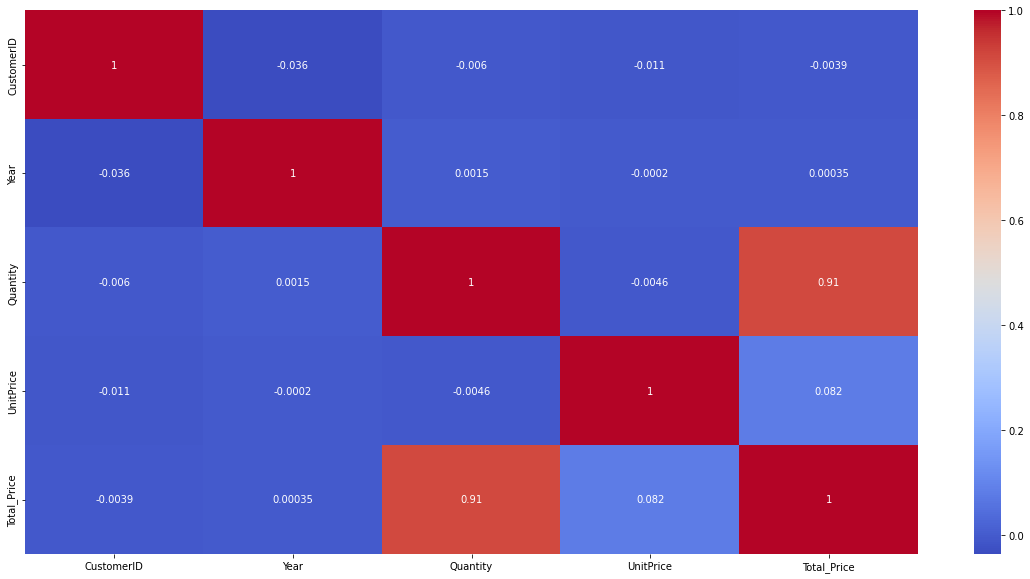

In [ ]:
# finding Correlation of all the numerical column that we are having
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = customerDF.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig.savefig('Heatmap2')

#**Feature Engineering**

##**Unique item stock codes**

In [ ]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(customerDF.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(customerDF.Description.unique())}")

Number of unique item stock codes: 3665
Number of unique item descriptions: 3877


In [ ]:
# COPYING DATASET IN OTHER VARIABLE
dfRetail = customerDF.copy()

In [ ]:
dfRetail.head()  #returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


**Filter UK only data:**

* We noticed in the exploratory data analysis phase that majority of the transactions belonged to UK, so it makes sense to consider only uk's data for maximum impact

In [ ]:
dfRetail = dfRetail[dfRetail.Country == "United Kingdom"] # considering united kingdom data only.

**Exclude return transactions:**

We remove the negative (return goods) transactions before proceeding with the analysis.

In [ ]:
dfRetail = dfRetail[dfRetail.Total_Price >= 0]   #  taking total price greater than 0
dfRetail.head()   # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [ ]:
dfRetail.shape   # returns the shape of the dataset

(349203, 13)

##**Building features for RFM model:**


RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.



**RFM factors illustrate these facts:**

* The more recent the purchase, the more responsive the customer is to promotions
* The more frequently the customer buys, the more engaged and satisfied they are
* Monetary value differentiates heavy spenders from low-value purchasers

In [ ]:
# Split datetime from InvoiceDate
dfRetail['Date'] = dfRetail['InvoiceDate'].dt.date  # extracting date
dfRetail['Time'] = dfRetail['InvoiceDate'].dt.time  #xtracting time
dfRetail.head()  # returns the first 5 rows of the dataset

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Date,Time
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01,08:26:00
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01,08:26:00
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01,08:26:00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01,08:26:00
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01,08:26:00


In [ ]:
# returns the range of the dataset innterms of date
earliest_date = dfRetail['Date'].min()
end_date = dfRetail['Date'].max()
print("Actual Start Date: {}, Actual End Date: {}".format(earliest_date, end_date))

Actual Start Date: 2010-12-01, Actual End Date: 2011-12-09


In [ ]:
# Filter 1-year data range from original df
start_date = end_date - pd.to_timedelta(364, unit='d')
df_rfm = dfRetail[(dfRetail['Date'] >= start_date) & (dfRetail['Date'] <= end_date)]

print("RFM Start Date: {}, RFM End Date: {}".format(
    df_rfm['Date'].min(), df_rfm['Date'].max()))

RFM Start Date: 2010-12-10, RFM End Date: 2011-12-09


In [ ]:
#importing package
import datetime as dt

In [ ]:
# Create hypothetical snapshot date
snapshot_date = end_date + dt.timedelta(days=1)

In [ ]:
df_rfm = df_rfm.groupby(['CustomerID']).agg({'Date': lambda x: (snapshot_date - x.max()).days,'InvoiceNo': 'count','Total_Price': 'sum'})   
df_rfm       # # (Filter 1-year data range from original df)====run this and try again if u get any error

,Date,InvoiceNo,Total_Price
CustomerID,,,
12346,326,1,77183.60
12747,3,96,3837.45
12748,1,4054,31081.74
12749,4,199,4090.88
12820,4,59,942.34
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [ ]:
# Rename the columns
df_rfm.rename(columns={'Date': 'Recency','InvoiceNo': 'Frequency','Total_Price': 'MonetaryValue'}, inplace=True)

In [ ]:
# Print top 5 rows
print(df_rfm.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12747             3         96        3837.45
12748             1       4054       31081.74
12749             4        199        4090.88
12820             4         59         942.34


**Building RFM Segments**

Assigning quantile to each customer

In [ ]:
# Obtain quantile of each customer
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    
    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [ ]:
df_rfm_quantile = df_rfm.copy()
#applying function which we've created above
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12747,3,96,3837.45,4,3,4
12748,1,4054,31081.74,4,4,4
12749,4,199,4090.88,4,4,4
12820,4,59,942.34,4,3,3


**OBSERVATION:**

* Here we've assigned the quantile to the each customer.

##**Calculate RFM Score:**

In [ ]:
# Concatenate RFM quartile values
def join_rfm(x): 
    return str(x['Recency_Q']) + str(x['Frequency_Q']) + str(x['MonetaryValue_Q'])

In [ ]:
# Form RFM segment
df_rfm_quantile['RFM_Segment'] = df_rfm_quantile.apply(join_rfm, axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0
12747,3,96,3837.45,4,3,4,4.03.04.0
12748,1,4054,31081.74,4,4,4,4.04.04.0
12749,4,199,4090.88,4,4,4,4.04.04.0
12820,4,59,942.34,4,3,3,4.03.03.0


In [ ]:
# Calculate RFM_Score
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','MonetaryValue_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0,6
12747,3,96,3837.45,4,3,4,4.03.04.0,11
12748,1,4054,31081.74,4,4,4,4.04.04.0,12
12749,4,199,4090.88,4,4,4,4.04.04.0,12
12820,4,59,942.34,4,3,3,4.03.03.0,10


##**Creating Custom Segments:**

In [ ]:
# creating function for customer segmentation
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver'
    else:
        return '3.Bronze'

In [ ]:
# applying the above return function 
df_rfm_quantile['General_Segment'] = df_rfm_quantile.apply(segment_me, axis=1)
df_rfm_quantile['General_Segment']

CustomerID
12346    2.Silver
12747      1.Gold
12748      1.Gold
12749      1.Gold
12820      1.Gold
           ...   
18280    3.Bronze
18281    3.Bronze
18282    2.Silver
18283      1.Gold
18287      1.Gold
Name: General_Segment, Length: 3854, dtype: object

In [ ]:
 # calculating mean,and count of RFM by grouping general segments
df_rfm_custom_segment = df_rfm_quantile.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
1.Gold             26.1     182.0        3830.1  1493
2.Silver           95.6      34.0         691.3  1679
3.Bronze          204.8      10.9         188.4   682

##**Data Pre-Processing for Clustering**




##Reducing Skewness:

In [ ]:
# creating function to check the skewness
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [ ]:
# importing pacxkage
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Recency's: Skew: 1.231757127183578, : SkewtestResult(statistic=24.892423013020622, pvalue=8.987491689012147e-137)
Frequency's: Skew: 18.58149851609503, : SkewtestResult(statistic=79.34233898270591, pvalue=0.0)
MonetaryValue's: Skew: 19.256832591598332, : SkewtestResult(statistic=80.08398425065265, pvalue=0.0)


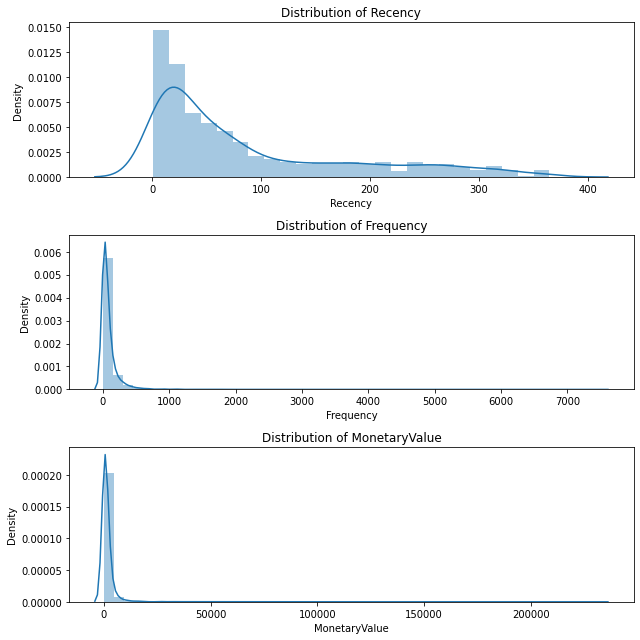

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

Above we can see all the 3 graphs are positively skewed.

In [ ]:
#extracting mean count etc
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3854.000000,3854.000000,3854.000000
mean,87.980540,87.222366,1818.264267
std,93.431824,209.423937,7190.915178
min,1.000000,1.000000,3.750000
25%,18.000000,16.250000,291.910000
50%,50.000000,40.000000,638.540000
75%,134.000000,96.000000,1545.567500
max,365.000000,7491.000000,231822.690000


In [ ]:
# Copy original to new df
df_rfm_log = df_rfm.copy()

# Data Pre-Processing for Negative Value
df_rfm_log['MonetaryValue'] = (df_rfm_log['MonetaryValue'] - df_rfm_log['MonetaryValue'].min()) + 1

df_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,3854.000000,3854.000000,3854.000000
mean,87.980540,87.222366,1815.514267
std,93.431824,209.423937,7190.915178
min,1.000000,1.000000,1.000000
25%,18.000000,16.250000,289.160000
50%,50.000000,40.000000,635.790000
75%,134.000000,96.000000,1542.817500
max,365.000000,7491.000000,231819.940000


##log transformation:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: -0.4729218733061046, : SkewtestResult(statistic=-11.425452174695339, pvalue=3.1202721941354987e-30)
Frequency's: Skew: -0.22769651815992994, : SkewtestResult(statistic=-5.709957369384244, pvalue=1.1300447597026015e-08)
MonetaryValue's: Skew: 0.31247702569932584, : SkewtestResult(statistic=7.753904229247155, pvalue=8.910954176100763e-15)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


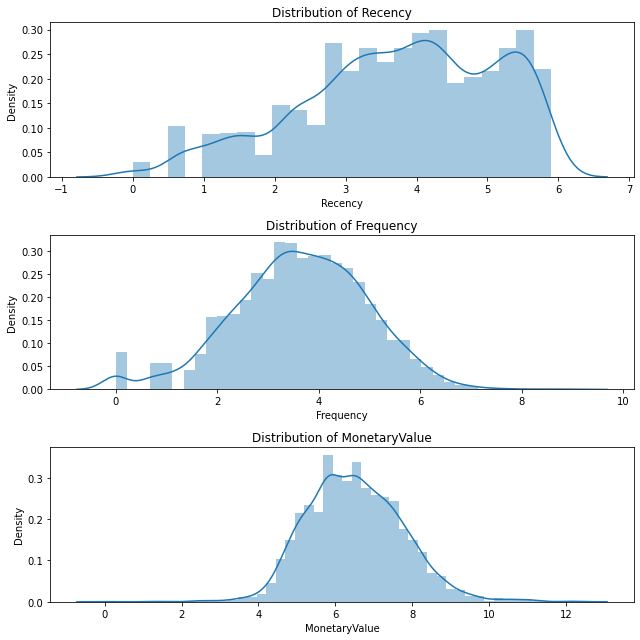

In [ ]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm_log)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

Now after log transformation we can see data is normally distributed(normal distribution).

##**Centering and Scaling:**

In [ ]:
# importing packages
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)
df_rfm_normal

array([[ 1.48235147e+00, -2.75461326e+00,  3.78213425e+00],
       [-1.95061215e+00,  6.98737490e-01,  1.38562705e+00],
       [-2.75506324e+00,  3.53074659e+00,  3.05599647e+00],
       ...,
       [-1.23240687e+00, -8.74551991e-01, -1.07736754e+00],
       [-1.73995899e+00,  2.22424772e+00,  8.82881868e-01],
       [-9.51037626e-04,  4.59765577e-01,  7.97047352e-01]])

In [ ]:
# creating a dataframe for above created array
df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)
df_rfm_normal

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,1.482351,-2.754613,3.782134
12747,-1.950612,0.698737,1.385627
12748,-2.755063,3.530747,3.055996
12749,-1.739959,1.250260,1.436715
12820,-1.739959,0.330420,0.262913
...,...,...,...
18280,1.365723,-1.012495,-1.065839
18281,1.051499,-1.282353,-1.723097
18282,-1.232407,-0.874552,-1.077368


In [ ]:
# Check result after standardising
df_rfm_normal.describe().round(3)

##**K-Means Clustering**



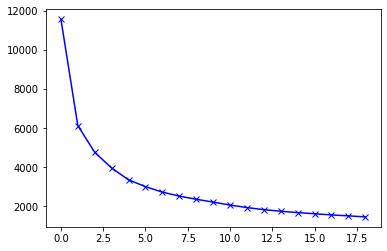

In [ ]:
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(df_rfm_normal)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [ ]:
# here we can consider optimul number of cluster = 3,
# However, during the implemention of KMEans, cluster of 3, 4, and 5 will be tested to experiment which cluster makes most business sense.

##**Implementing KMeans:**

In [ ]:
#creating function
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

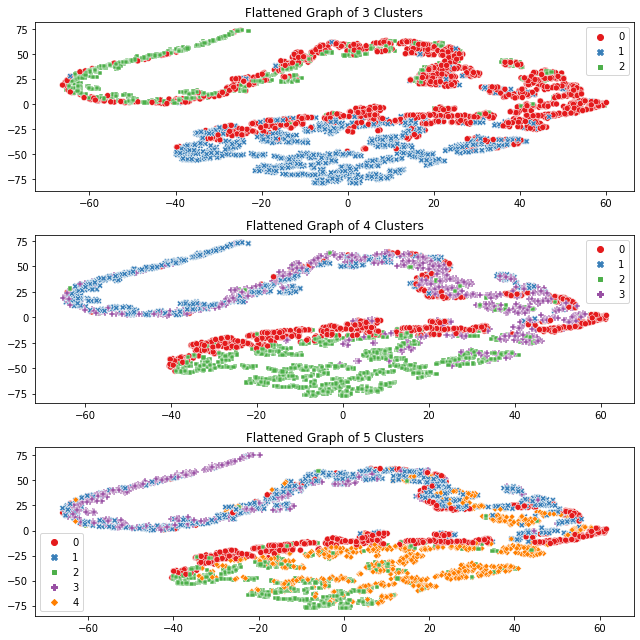

In [ ]:
# plotting clusters by using the above fucntion
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_normal, 3, df_rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_normal, 4, df_rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_normal, 5, df_rfm)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

##**Applying Classification Models:**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(3854, 4)

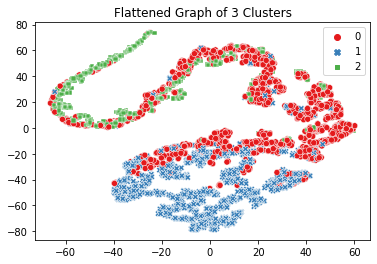

In [ ]:
#with 3 clusters
df=kmeans(df_rfm_normal, 3, df_rfm)
df.shape

As we got optimal cluster 3 therefore considering 3 clusters model.

In [ ]:
#Assigning cluster colum to data frame
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(df_rfm_normal)

# Extract cluster labels
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
df_new = df_rfm.assign(Cluster = cluster_labels)

In [ ]:
df_new.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,0
12747,3,96,3837.45,2
12748,1,4054,31081.74,2
12749,4,199,4090.88,2
12820,4,59,942.34,2


In [ ]:
# getting the count of unique values of cluster 
df_new['Cluster'].value_counts()

0    1629
1    1373
2     852
Name: Cluster, dtype: int64

In [ ]:
#importing library and package
from sklearn.preprocessing import MinMaxScaler

##Splitting:

In [ ]:
# splitting into dependent(y) and independent variable(x)
X=df_new[['Recency','Frequency','MonetaryValue']]
y=df_new['Cluster']

In [ ]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(3083, 3)
(771, 3)


##Scaling:

In [ ]:
# scaling dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#**Logistic Regression:**

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. ... A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [ ]:
#importing library and package
from sklearn.linear_model import LogisticRegression
#fitting logistic regression
clf = LogisticRegression(fit_intercept=True, max_iter=100,penalty = 'none',solver='sag')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='sag')

In [ ]:
# Get the model coefficients
clf.coef_

array([[  15.17760156,   57.63780193,   15.032055  ],
       [  19.61165025, -277.22777531, -169.71711835],
       [ -34.7892518 ,  219.58997339,  154.68506336]])

In [ ]:
feature_importance = [  15.52002116,   60.06928687,   12.96037972,
       19.9337846 , -277.45534921, -168.09877128,
       -35.45380577,  217.38606234,  155.13839156]

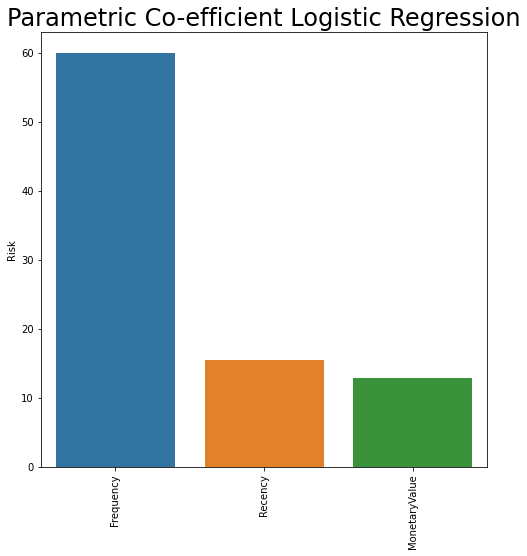

In [ ]:
# Feature Importance plot
dictionary = dict(zip(df_new.columns.to_list()[:-1], feature_importance))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Risk'},inplace=True)

fig, ax = plt.subplots(figsize = ( 8, 8 ))
sns.barplot(x=your_df_from_dict.index, y='Risk', data=your_df_from_dict)
ax.set_title( "Parametric Co-efficient Logistic Regression" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)

**OBSERVATION:**

Here we can see Frequency is importent variable.

##PREDICTING VALUES:

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# predicting the data
y_pred_cnb = clf.predict(X_test)
y_prob_pred_cnb_train = clf.predict_proba(X_train)
y_prob_pred_cnb = clf.predict_proba(X_test)

##Train Evaluation:

In [ ]:
# import metric for classification model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve,average_precision_score,auc
import seaborn as sns
from sklearn import metrics

[[1169   93   33]
 [  71 1038    0]
 [  62    0  617]]


[Text(0, 0.5, 'Not Risk'), Text(0, 1.5, 'Risk')]

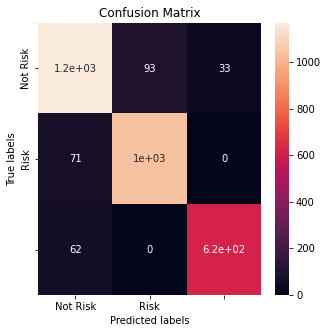

In [ ]:
# Get the confusion matrix for training set
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9159909179370743
The accuracy on test data is  0.914396887159533


In [ ]:
#roc auc score
roc_auc_score(y_train, y_prob_pred_cnb_train, multi_class='ovo', average='weighted')

0.9815714391330312

In [ ]:
# train classification report
# classification report for train
print(metrics.classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1295
           1       0.92      0.94      0.93      1109
           2       0.95      0.91      0.93       679

    accuracy                           0.92      3083
   macro avg       0.92      0.92      0.92      3083
weighted avg       0.92      0.92      0.92      3083



**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of 0.92 and AUC ROC score of 0.98 for train data.

##TEST EVALUATION:

[[310  21   3]
 [ 21 243   0]
 [ 21   0 152]]


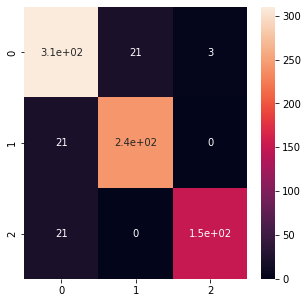

In [ ]:
# Get the confusion matrix for both test
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

fig.savefig('Confusion matrix Logistic test')

In [ ]:
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9804424993004068

In [ ]:
# classification report for test
print(metrics.classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       334
           1       0.92      0.92      0.92       264
           2       0.98      0.88      0.93       173

    accuracy                           0.91       771
   macro avg       0.93      0.91      0.92       771
weighted avg       0.92      0.91      0.91       771



**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got  accuracy of 0.91 and AUC ROC score of 0.98 for test data.

With logistic regression we got the accuracy score of 0.92 on train data and 0.91 on test data.



##**Random Forest Classifier:**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [ ]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
  'bootstrap': [True],

    'max_depth': [80, 90, 100, 110],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4, 5],

    'min_samples_split': [8, 10, 12],

    'n_estimators': [ 300, 1000]
    


}

# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)



# Fit the grid search to the data

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
# prediction
grid_prediction_train = grid_search.predict(X_train)
grid_prediction_test =grid_search.predict(X_test)

In [ ]:
#predicting the data
y_pred_cnb = grid_search.predict(X_test)
y_prob_pred_cnb_train = grid_search.predict_proba(X_train)
y_prob_pred_cnb = grid_search.predict_proba(X_test)

##Train Evaluation:

[[1291    1    3]
 [   0 1109    0]
 [   2    0  677]]


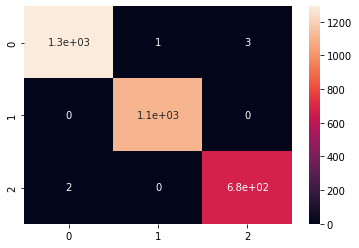

In [ ]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1109
           2       1.00      1.00      1.00       679

    accuracy                           1.00      3083
   macro avg       1.00      1.00      1.00      3083
weighted avg       1.00      1.00      1.00      3083



In [ ]:
#roc auc score
roc_auc_score(y_train, y_prob_pred_cnb_train, multi_class='ovo', average='weighted')

0.9999645334003593

**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of 1.00 and AUC ROC score of 0.999 for train data.

##Test Evaluation:

[[324   4   6]
 [  5 259   0]
 [  6   0 167]]


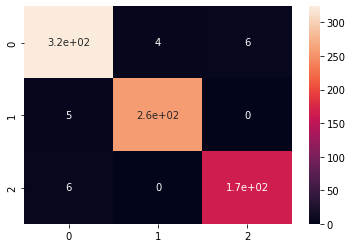

In [ ]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       334
           1       0.98      0.98      0.98       264
           2       0.97      0.97      0.97       173

    accuracy                           0.97       771
   macro avg       0.97      0.97      0.97       771
weighted avg       0.97      0.97      0.97       771



In [ ]:
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9987773703638753

**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of 0.98 on test data.

With Random forest classifier we got the train accuracy of 1.00 and test accuracy of 0.97 and AUC ROC score of 0.998 for test data. 

##**XGBoost Classifier:**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [ ]:
# Various hyper-parameters to tune
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb1 = XGBClassifier()
#tuning hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,5,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv =3,
                        n_jobs = 5,
                        verbose=True)
#fitting model
xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)#getting best score
print(xgb_grid.best_params_)#getting best parameters

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9740536639147681
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
# prediction
grid_prediction_train = xgb_grid.predict(X_train)
grid_prediction_test = xgb_grid.predict(X_test)

In [ ]:
#predicting the data
y_pred_cnb = xgb_grid.predict(X_test)
y_prob_pred_cnb_train = xgb_grid.predict_proba(X_train)
y_prob_pred_cnb = xgb_grid.predict_proba(X_test)

##Train Evaluation:

[[1293    1    1]
 [   0 1109    0]
 [   1    0  678]]


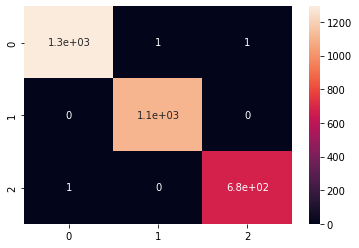

In [ ]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1109
           2       1.00      1.00      1.00       679

    accuracy                           1.00      3083
   macro avg       1.00      1.00      1.00      3083
weighted avg       1.00      1.00      1.00      3083



In [ ]:
#roc auc score
roc_auc_score(y_train, y_prob_pred_cnb_train, multi_class='ovo', average='weighted')

0.9999936348522491

**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of 1.00 and AUC ROC score of 0.999 for train data.

##Test Evaluation:

[[325   3   6]
 [  5 259   0]
 [  4   0 169]]


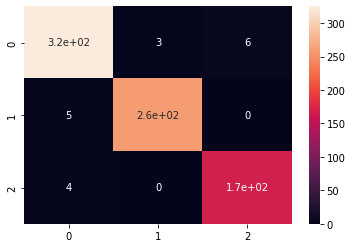

In [ ]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       334
           1       0.99      0.98      0.98       264
           2       0.97      0.98      0.97       173

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



In [ ]:
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9990084835376231

**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of 0.97 on test data.

With XGBoost classifier we got the train accuracy of 1.00 and test accuracy of 0.97 and AUC ROC score of 0.998 for test data.

##**Model Comparison:**

In [ ]:
evaluation_dict={'Model_Name':['Logistic Regression','Random Forest','XGBoost'],
                 
                 'Train ROC AUC score':[ 0.9817028876308256, 0.9999737811937799, 0.9999977229486454],
                 
                 'Test ROC AUC score':[0.9798160852100829, 0.9988217245465557, 0.9989820948576079 ],
                 
                 'Train Accuracy score':[0.92, 1.00, 1.00 ],
                 
                 'Test Accuracy score':[0.91, 0.98, 0.97 ]
               
                 
                }
evaluation_df=pd.DataFrame(evaluation_dict)
evaluation_df

,Model_Name,Train ROC AUC score,Test ROC AUC score,Train Accuracy score,Test Accuracy score
0,Logistic Regression,0.981703,0.979816,0.92,0.91
1,Random Forest,0.999974,0.998822,1.00,0.98
2,XGBoost,0.999998,0.998982,1.00,0.97


**Observation:**

* Here we can see random forest has highest test accuracy score therefore random forest is our optimal model.


#**Observations/Inferences/Conclusion:**

 **1. Three Clusters (Customer Segments):**

 
 Carefully examining the three cluster classification, I observe following groups of customers:

  * **High value customer:**

    'Cluster 2' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.

  * **Medium value customer:**

    'Cluster 0' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.

  * **Low value customer:**

    It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones.

**2. Five Clusters (Customer Segments):**

***In five clusters, we find the following customer segments:***

* **Overall high valued customers:**

'Cluster 0' is the typical high value customer who has shopped recently and shops regularly for high value orders.

* **High monetary value but less frequent:**

'Cluster 1' represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.

* **Medium value - low frequency - recent customers:**

The customers from 'Cluster 4' have recently placed medium valued orders but do not do so frequently.

* **Medium value - low frequency - older customers:**

The customers from 'Cluster 3' happen to place medium valued orders quite a long time ago and they do not do so frequently.

* **Low valued customers:**

'Cluster 2' is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.
The visualization of clusters in Silhoutte Analysis show some overlapp between the customer segments.
However, the dataset does not distinguish between wholesale and retail customers, it is quite likely that high value frequent clients are the wholesale dealers and medium/ low valued ones are individual retail purchasers.

#**Summary of Conclusion:**

The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.

##**Summary:**

This study started with importing dataset, analyzing dataset after this I have done preprocessing, I have checked for The null values as our dataset contains many null values in Customer id feature and we have to segment the customers, without customer id we are unable to segment customers therefore I have removed all the rows without Customer id. 
 
 After that I have done some exploratory data analysis(EDA) I came to know about top customers, Worst customers, periodical purchasing stats, most revenue generated weekday, purchase stats of country, top and lease purchasing country, top sold product, most revenue generated product, Customer stats, etc.
 
 After that I have done some feature engineering to build RFM model (recency, frequency and monetary value) I have extracted and analyzed RFM score then I have created customer segment in 3 category bronze, silver and gold.

 After that I have done data preprocessing for clustering with the help of log transformation I have reduced Skewness of data then I have scaled data, after scaling i used elbow graph and I came to know that optimal number of cluster is 3.
 
 Then I have implemented Kmeans clustering and plotted different graphs to visualize clusters. after that I have mergerd cluster column to data and used classification model for prediction. I have used Logistic Regression, Random Forest Classifier and XGBoost and done evaluation of it, my Optimal model was Random Forest as I got train Accuracy of 1.00 and test accuracy of 0.98 with it.